<a href="https://colab.research.google.com/github/mishadvor/FinanceReport/blob/main/FiRWB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Загрузка данных
df = pd.read_excel('/content/0.xlsx',
                   dtype=({'Баркод': str, 'Размер': str}))

#################11111###########################

# Группировка Продаж с агрегациями по Артикулу
summary1 = df.groupby('Артикул поставщика', as_index=False).agg({
    'Цена розничная': [
        ('Сумма продаж', 'sum'),  # Сумма (включая нули)
        ('Средняя цена', lambda x: x[x != 0].mean())  # Среднее БЕЗ нулей
    ]
    #'Вайлдберриз реализовал Товар (Пр)': 'sum',
    #'Цена розничная с учетом согласованной скидки': 'sum',
    #'Вознаграждение с продаж до вычета услуг поверенного, без НДС': 'sum',
    #'Эквайринг/Комиссии за организацию платежей': 'sum',
    #'Вознаграждение Вайлдберриз (ВВ), без НДС': 'sum',
    #'НДС с Вознаграждения Вайлдберриз': 'sum',
    #'К перечислению Продавцу за реализованный Товар': 'sum',
    #'Услуги по доставке товара покупателю': 'sum',
})

# Переименование столбцов
summary1.columns = [
    'Артикул поставщика',
    'Сумма продаж',
    'Цена средняя'
    #'Вайлдберриз реализовал Товар (Пр)',
    #'Цена розничная с учетом согласованной скидки',
    #'Вознаграждение с продаж до вычета услуг поверенного, без НДС',
    #'Эквайринг/Комиссии за организацию платежей',
    #'Вознаграждение Вайлдберриз (ВВ), без НДС',
    #'НДС с Вознаграждения Вайлдберриз',
    #'К перечислению Продавцу за реализованный Товар',
    #'Услуги по доставке товара покупателю'
    # Добавьте, если раскомментировали:
    # 'Средняя цена',
    # 'Максимальная цена',
    # 'Количество записей',
    # 'Сумма к перечислению'
]
###########22222###################
# Группировка Продаж по Артикулу и Размеру
summary2=df.groupby(['Артикул поставщика','Размер'], as_index=False).agg({
    'Цена розничная': 'sum'
   # 'Вайлдберриз реализовал Товар (Пр)': 'sum',
    #'Цена розничная с учетом согласованной скидки': 'sum',
    #'Вознаграждение с продаж до вычета услуг поверенного, без НДС': 'sum',
    #'Эквайринг/Комиссии за организацию платежей': 'sum',
    #'Вознаграждение Вайлдберриз (ВВ), без НДС': 'sum',
    #'НДС с Вознаграждения Вайлдберриз': 'sum',
    #'К перечислению Продавцу за реализованный Товар': 'sum',
    #'Услуги по доставке товара покупателю': 'sum',
})
# Переименования столбцов
summary2.columns = [
    'Артикул',
    'Размер',
    #'Баркод',
    'Сумма продаж'
    #'Вайлдберриз реализовал Товар (Пр)',
    #'Цена розничная с учетом согласованной скидки',
    #'Вознаграждение с продаж до вычета услуг поверенного, без НДС',
    #'Эквайринг/Комиссии за организацию платежей',
    #'Вознаграждение Вайлдберриз (ВВ), без НДС',
    #'НДС с Вознаграждения Вайлдберриз',
    #'К перечислению Продавцу за реализованный Товар',
    #'Услуги по доставке товара покупателю'
]
###############3333333####################
# Группировка Только по Размеру
summary3=df.groupby('Размер', as_index=False).agg({
    'Цена розничная': 'sum'
})

# Переименование столбцов
summary3.columns = [
    'Размер',
    'Сумма продаж'
]

#################444444###################
# Группировка возвратов по Артикулу и размеру
summary4 = df.groupby(['Артикул поставщика', 'Размер'], as_index=False).agg({
    'Количество возврата': 'sum'
})

##############55555###############
# Группировка Возвратов по Артикулам
summary5 = df.groupby(['Артикул поставщика'], as_index=False).agg({
    'Количество возврата': 'sum'
 })

###############66666########################
# Подсчет СПП
df['СПП'] = df['Цена розничная'] - df['Вайлдберриз реализовал Товар (Пр)']

# Группировка по Артикулу и СПП
summary6=df.groupby('Артикул поставщика').agg({
    'СПП': 'sum'
 })

##########################################

# Сумма столбца СПП
sum_SPP = df['СПП'].sum()

# Преобразуем число в DataFrame
sum_SPP_df = pd.DataFrame({'Total': [sum_SPP]})

############################################

# Сумма всей логистики
sum_log = df['Услуги по доставке товара покупателю'].sum()

# Преобразуем число в DataFrame
sum_log_df = pd.DataFrame({'Total': [sum_log]})




#########################################

# С какого склада большн всего отправлений

summary7 = df.groupby(['Склад'], as_index=False).agg({
    'Количество возврата': 'sum',
    'Цена розничная': "sum"

})

######################################

# Сортируем Колонку 'Виды логистики, штрафов и доплат' по типам и связываем с Артикулом продавца

# 1. Сначала преобразуем списки в отдельные строки с помощью explode()
df_exploded = df.explode('Виды логистики, штрафов и доплат')

# 2. Заполним пропущенные значения (если есть)
df_exploded['Виды логистики, штрафов и доплат'
] = df_exploded['Виды логистики, штрафов и доплат'
].fillna('Не указано')

# 3. Теперь можем группировать, считать и отсортировать по одному из сторлбцов.
status_log = (df_exploded.groupby('Артикул поставщика')
              ['Виды логистики, штрафов и доплат']
              .value_counts()
              .unstack(fill_value=0)
              .sort_values('К клиенту при продаже', ascending=False)
              )

# Указываем numeric_only=True для суммирования только числовых столбцов
sums = status_log.sum(numeric_only=True).to_frame("Сумма").T

# Добавляем строку с идентификатором (если нужно)
sums.index = ["Итого"]  # или "Сумма"



######################################

# Группировка по Логистики с агрегациями по Артикулу
summary8 = df.groupby('Артикул поставщика', as_index=False).agg({
    'Услуги по доставке товара покупателю': 'sum'
})

#####################################


# Расчет процента логистики
summary9 = pd.DataFrame({
    'Артикул поставщика': summary1['Артикул поставщика'],  # Добавляем артикул для ясности
    '% Логистики': summary8['Услуги по доставке товара покупателю'] / summary1['Сумма продаж'] * 100,
     'Сумма продаж': summary1['Сумма продаж'],
     'Логистика': summary8['Услуги по доставке товара покупателю'],  # Добавляем колонку для сортировки
    'Цена средняя': summary1['Цена средняя']
    })

summary9['% Логистики'] = summary9['% Логистики'].replace([float('inf'), -float('inf')], 100)


#####################################


# Сортировка summary (а не df) и сохранение результата
summary1.sort_values(by='Сумма продаж', ascending=False, inplace=True)
summary2.sort_values(by='Сумма продаж', ascending=False, inplace=True)
summary3.sort_values(by='Сумма продаж', ascending=False, inplace=True)
summary4.sort_values(by='Количество возврата', ascending=False, inplace=True)
summary5.sort_values(by='Количество возврата', ascending=False, inplace=True)
summary6.sort_values(by='СПП', ascending=False, inplace=True)
summary7.sort_values(by='Количество возврата', ascending=False, inplace=True)
summary8.sort_values(by='Услуги по доставке товара покупателю', ascending=False, inplace=True)
summary9.sort_values(by='Сумма продаж', ascending=False, inplace=True)

############################################

# Записываем в один файл на разные страницы. Если это одно число, не забываем делать DF/Siries
with pd.ExcelWriter('/content/CorSvetaRusFRW_150425.xlsx') as writer:
  summary1.to_excel(writer, sheet_name='Articles', index=False)
  summary2.to_excel(writer, sheet_name='ArtAndSize', index=False)
  summary3.to_excel(writer, sheet_name='SizeOnly', index=False)
  summary4.to_excel(writer, sheet_name='ReturnsArt&Size', index=False)
  summary5.to_excel(writer, sheet_name='ReturnsArtOnly', index=False)
  summary6.to_excel(writer, sheet_name='SPP')
  sum_SPP_df.to_excel(writer, sheet_name='Sum_SPP', index=False)
  sum_log_df.to_excel(writer, sheet_name='Sum_Log', index=False)
  status_log.to_excel(writer, sheet_name='Status_Log_Count')
  summary7.to_excel(writer, sheet_name='Sklad', index=False)
  sums.to_excel(writer, sheet_name='Sums_ALL_log')
  summary8.to_excel(writer, sheet_name='Log_By_Art', index=False)
  summary9.to_excel(writer, sheet_name='Pstg_Log_&_Sale', index=False)

#status_log.head(10)


# Новый раздел

In [ ]:
import pandas as pd

data = {
    'Art': ['A', 'A', 'A', 'C', 'C','C','D','D', 'D', 'B', 'B', 'B'],
    'A': [5, 15, 25, 9, 10, 17, 25, 17, 13, 12, 17, 12],
    'B': [7, 10, 7, 19, 23, 35, 33, 32, 55, 34, 66, 67]

}

df = pd.DataFrame(data)

# Указываем numeric_only=True для суммирования только числовых столбцов
sums = df.sum(numeric_only=True).to_frame("Сумма").T

# Добавляем строку с идентификатором (если нужно)
sums.index = ["Итого"]  # или "Сумма"

delta=(sums['A']*600)#-sums['B']


#sums = df.sum().to_frame("Сумма").T  # .T - транспонируем (столбцы станут строками)
# summary1 = df.groupby('Art').agg({
#    'A': 'sum'
# })

# Переименование столбцов
# summary1.columns = [

#    'Сумма'

# ]

# Сумма колонок A и B
#df['СПП'] = df['A'] + df['B']

# Разность колонок A и B
#df['A_minus_B'] = df['A'] - df['B']

# Произведение колонок A и B
#df['A_multiply_B'] = df['A'] * df['B']

# Деление колонки A на B
#df['A_divide_B'] = df['A'] / df['B']

delta
#sums


,A
Итого,106200


Найдены файлы: ['/content/week_sale_230325.xlsx', '/content/week_sale_310325.xlsx', '/content/week_sale_060425.xlsx']

Данные из /content/week_sale_230325.xlsx:
   №  Номер поставки Предмет  Код номенклатуры   Бренд  \
0  1               0    Юбки         234341237  Vellet   
1  2               0    Юбки         234341237  Vellet   

                                Артикул поставщика                  Название  \
0  юбка карандаш джерси 70 см - темно-серый меланж  Юбка карандаш на резинке   
1  юбка карандаш джерси 70 см - темно-серый меланж  Юбка карандаш на резинке   

   Размер         Баркод Тип документа  ...           ШК  \
0      48  2040190377979           NaN  ...  30640946591   
1      48  2040190377979       Продажа  ...  30640946591   

                                      Srid  \
0  dS.3ce11efdf86c422595c9486f278814eb.0.0   
1  dS.3ce11efdf86c422595c9486f278814eb.0.0   

  Возмещение издержек по перевозке/по складским операциям с товаром  \
0                               

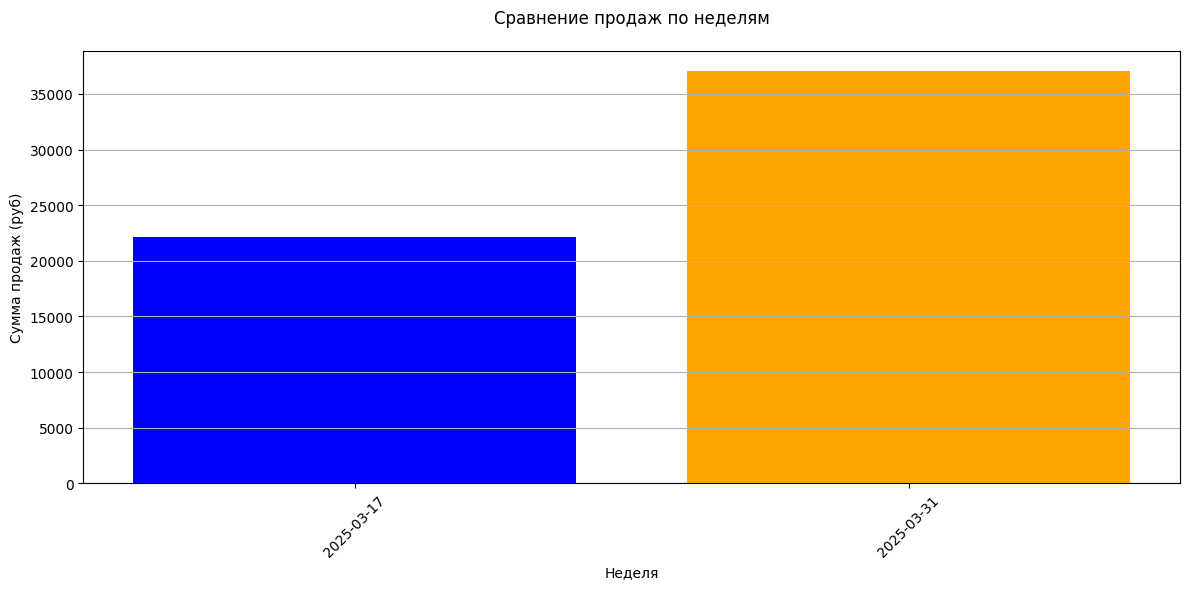

In [16]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from datetime import datetime

# 1. Загрузка файлов
all_files = glob.glob("/content/week_sale_*.xlsx")
print("Найдены файлы:", all_files)

df_list = []
for file in all_files:
    try:
        # Чтение файла
        df = pd.read_excel(file)
        print(f"\nДанные из {file}:")
        print(df.head(2))  # Покажем первые строки для проверки

        # Извлечение даты из названия файла
        date_str = file.split("_")[-1].split(".")[0]
        file_date = datetime.strptime(date_str, "%d%m%y").date()

        # Проверка соответствия дат
        if "Дата заказа покупателем" in df.columns:
            df["Дата заказа покупателем"] = pd.to_datetime(df["Дата заказа покупателем"]).dt.date
            min_date = df["Дата заказа покупателем"].min()
            max_date = df["Дата заказа покупателем"].max()
            print(f"Даты в файле: {min_date} - {max_date}")

        # Добавляем метку недели
        df["Неделя_файла"] = file_date
        df_list.append(df)

    except Exception as e:
        print(f"Ошибка при обработке {file}: {str(e)}")

# 2. Объединение данных
if not df_list:
    raise ValueError("Нет данных для обработки")

sales_data = pd.concat(df_list, ignore_index=True)

# 3. Группировка по неделям (учитываем возможные расхождения дат)
sales_data["Неделя_начала"] = pd.to_datetime(sales_data["Неделя_файла"]) - pd.to_timedelta(
    pd.to_datetime(sales_data["Неделя_файла"]).dt.dayofweek, unit="D"
)

weekly_sales = sales_data.groupby("Неделя_начала", as_index=False).agg({
    "Цена розничная": "sum"
})

# 4. Вывод результатов
print("\nИтоговые данные по неделям:")
print(weekly_sales)

# 5. Визуализация
plt.figure(figsize=(12, 6))
plt.bar(
    weekly_sales["Неделя_начала"].astype(str),
    weekly_sales["Цена розничная"],
    color=['blue', 'orange', 'green']
)
plt.title("Сравнение продаж по неделям", pad=20)
plt.xlabel("Неделя")
plt.ylabel("Сумма продаж (руб)")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

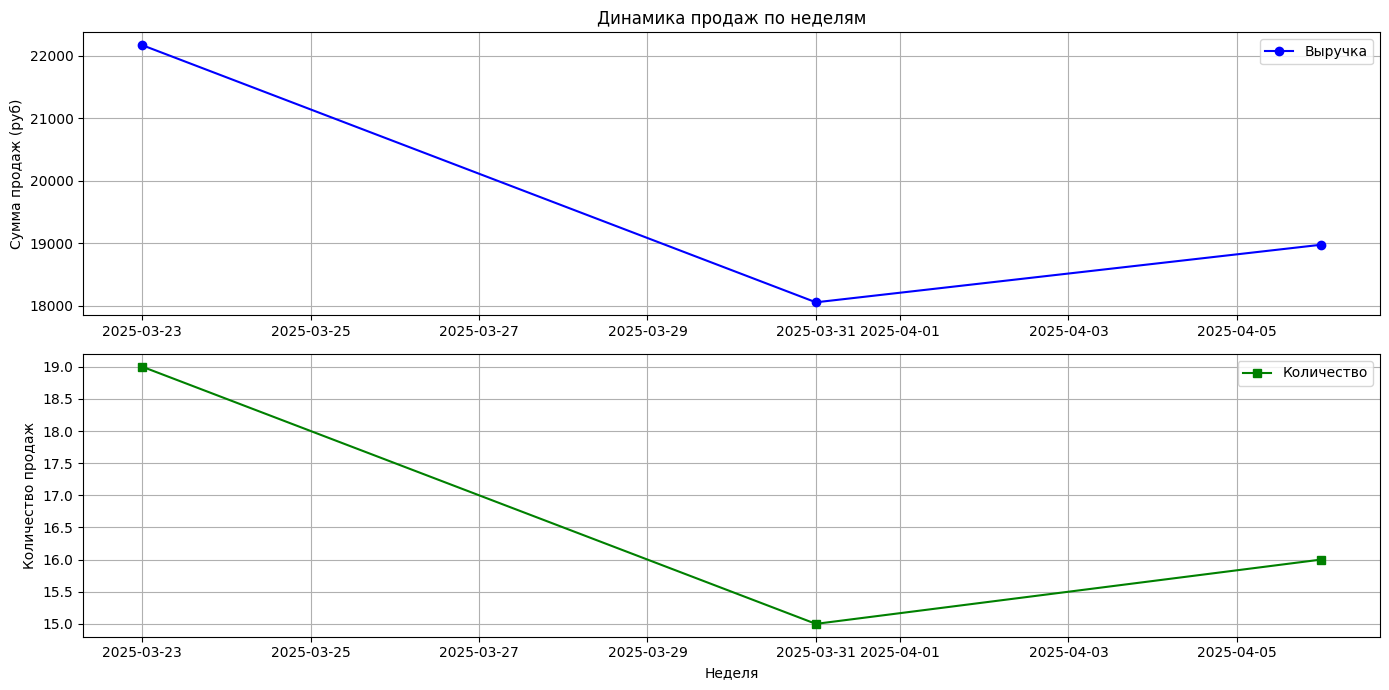

In [17]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from datetime import datetime

# 1. Настройка
files = glob.glob("/content/week_sale_*.xlsx")  # Путь к вашим файлам
columns_to_analyze = ["Цена розничная", "Кол-во"]  # Колонки для анализа

# 2. Загрузка и обработка данных
all_data = []
for file in files:
    try:
        # Извлекаем дату из названия файла (формат DDMMYY)
        date_str = file.split("_")[-1].split(".")[0]
        week_date = datetime.strptime(date_str, "%d%m%y").date()

        # Читаем файл
        df = pd.read_excel(file)

        # Добавляем метку недели
        df["Неделя"] = week_date
        all_data.append(df)

    except Exception as e:
        print(f"Ошибка при обработке {file}: {str(e)}")

# Объединяем все данные
if not all_data:
    raise ValueError("Нет данных для анализа")
sales_data = pd.concat(all_data, ignore_index=True)

# 3. Агрегация по неделям
weekly_stats = sales_data.groupby("Неделя").agg({
    "Цена розничная": "sum",
    "Кол-во": "sum"
}).reset_index()

# 4. Визуализация
plt.figure(figsize=(14, 7))

# График выручки
plt.subplot(2, 1, 1)
plt.plot(weekly_stats["Неделя"], weekly_stats["Цена розничная"],
         marker="o", color="blue", label="Выручка")
plt.title("Динамика продаж по неделям")
plt.ylabel("Сумма продаж (руб)")
plt.grid(True)
plt.legend()

# График количества продаж
plt.subplot(2, 1, 2)
plt.plot(weekly_stats["Неделя"], weekly_stats["Кол-во"],
         marker="s", color="green", label="Количество")
plt.xlabel("Неделя")
plt.ylabel("Количество продаж")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from datetime import datetime
import os

# 1. Настройки
input_folder = "/content/report_*.xlsx"  # Паттерн для поиска файлов
output_folder = "/content/"  # Куда сохранять графики
os.makedirs(output_folder, exist_ok=True)

# 2. Сбор данных из всех файлов
all_data = {}
for file in glob.glob(input_folder):
    # Извлекаем дату из имени файла (формат: report_YYYY-MM-DD.xlsx)
    try:
        date_str = os.path.basename(file).split('_')[1].split('.')[0]
        file_date = datetime.strptime(date_str, "%Y-%m-%d").date()
    except:
        print(f"Не удалось извлечь дату из {file}, пропускаем")
        continue

    # Читаем все листы из файла
    with pd.ExcelFile(file) as xls:
        for sheet_name in xls.sheet_names:
            df = pd.read_excel(xls, sheet_name=sheet_name)

            # Добавляем дату как столбец
            df['Дата_отчета'] = file_date

            # Сохраняем в словаре
            if sheet_name not in all_data:
                all_data[sheet_name] = []
            all_data[sheet_name].append(df)

# 3. Обработка и визуализация для каждого листа
for sheet_name, dfs in all_data.items():
    # Объединяем все данные по этому листу
    combined = pd.concat(dfs, ignore_index=True)

    # Группируем по дате отчета (можно добавить другие параметры группировки)
    stats = combined.groupby('Дата_отчета').agg({
        'Цена розничная': 'sum',           # Сумма продаж
        'Кол-во': 'count',     # Общее количество
        "Услуги по доставке товара покупателю": "sum"
    }).reset_index()

    # Сортировка по дате
    stats = stats.sort_values('Дата_отчета')

    # 4. Построение графиков
    plt.figure(figsize=(15, 10))

    # График 1: Динамика выручки
    plt.subplot(3, 1, 1)
    plt.plot(stats['Дата_отчета'], stats['Цена розничная'], marker='o', color='b')
    plt.title(f'{sheet_name} - Динамика выручки')
    plt.ylabel('Сумма продаж')
    plt.grid(True)

    # График 2: Динамика количества
    plt.subplot(3, 1, 2)
    plt.plot(stats['Дата_отчета'], stats['Кол-во'], marker='s', color='g')
    plt.title(f'{sheet_name} - Объем продаж')
    plt.ylabel('Количество')
    plt.grid(True)

     #График 3: Динамика средней прибыли
    plt.subplot(3, 1, 3)
    plt.plot(stats['Дата_отчета'], stats['Услуги по доставке товара покупателю'], marker='^', color='r')
    plt.title(f'{sheet_name} - Долистика')
    plt.ylabel('Логистика')
    plt.xlabel('Дата отчета')
    plt.grid(True)

    plt.tight_layout()

    # Сохранение графиков
    filename = f"{output_folder}{sheet_name}_trend.png"
    plt.savefig(filename, dpi=300)
    plt.close()

    print(f"График для {sheet_name} сохранен как {filename}")

print("Обработка завершена!")

График для Sheet1 сохранен как /content/Sheet1_trend.png
Обработка завершена!
